In [1]:
import pandas as pd
from sqlalchemy import create_engine
import datetime as dt
import numpy as np

In [2]:
airline_file = "Data/airlines.csv"
airline_df = pd.read_csv(airline_file)
airline_df.head()

,Airline ID,Name,Alias,IATA,ICAO,Callsign,Country,Active
0,-1,Unknown,\N,-,NaN,\N,\N,Y
1,1,Private flight,\N,-,NaN,NaN,NaN,Y
2,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N


In [3]:
# Changing the names of columns and filtering columns we require
airline_clean_df = airline_df[["Airline ID", "Name", "IATA", "ICAO", "Country", "Active"]].copy()
airline_clean_df = airline_clean_df.rename(columns = {"Name": "Operator"})
airline_clean_df

,Airline ID,Operator,IATA,ICAO,Country,Active
0,-1,Unknown,-,NaN,\N,Y
1,1,Private flight,-,NaN,NaN,Y
2,2,135 Airways,NaN,GNL,United States,N
3,3,1Time Airline,1T,RNX,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,NaN,WYT,United Kingdom,N
...,...,...,...,...,...,...
6157,21248,GX Airlines,NaN,CBG,China,Y
6158,21251,Lynx Aviation (L3/SSX),NaN,SSX,United States,N
6159,21268,Jetgo Australia,JG,\N,Australia,Y
6160,21270,Air Carnival,2S,\N,India,Y


In [4]:
# Changing the name of Airlines in the Airlines.csv
airline_clean_df = airline_clean_df.replace({'Aeroflot Russian Airlines': 'Aeroflot',
                                            'Avianca - Aerovias Nacionales de Colombia': 'Avianca',
                                            'Private flight': 'Private'})
airline_clean_df

,Airline ID,Operator,IATA,ICAO,Country,Active
0,-1,Unknown,-,NaN,\N,Y
1,1,Private,-,NaN,NaN,Y
2,2,135 Airways,NaN,GNL,United States,N
3,3,1Time Airline,1T,RNX,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,NaN,WYT,United Kingdom,N
...,...,...,...,...,...,...
6157,21248,GX Airlines,NaN,CBG,China,Y
6158,21251,Lynx Aviation (L3/SSX),NaN,SSX,United States,N
6159,21268,Jetgo Australia,JG,\N,Australia,Y
6160,21270,Air Carnival,2S,\N,India,Y


In [5]:
airline_clean_df['Active'] = airline_clean_df['Active'].replace({'n': 'N'})
airline_clean_df

,Airline ID,Operator,IATA,ICAO,Country,Active
0,-1,Unknown,-,NaN,\N,Y
1,1,Private,-,NaN,NaN,Y
2,2,135 Airways,NaN,GNL,United States,N
3,3,1Time Airline,1T,RNX,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,NaN,WYT,United Kingdom,N
...,...,...,...,...,...,...
6157,21248,GX Airlines,NaN,CBG,China,Y
6158,21251,Lynx Aviation (L3/SSX),NaN,SSX,United States,N
6159,21268,Jetgo Australia,JG,\N,Australia,Y
6160,21270,Air Carnival,2S,\N,India,Y


In [6]:
# Checking if the Operator names have been changed
airline_clean_df.loc[airline_clean_df['Operator'] == 'Avianca']

,Airline ID,Operator,IATA,ICAO,Country,Active
515,515,Avianca,AV,AVA,AVIANCA,Y


In [7]:
# Changing the names of Countries
airline_clean_df = airline_clean_df.replace({'ALASKA': 'United States',
                                                        'AVIANCA': 'Colombia',
                                                        'Russia]]': 'Russia'
                                                        })
airline_clean_df

,Airline ID,Operator,IATA,ICAO,Country,Active
0,-1,Unknown,-,NaN,\N,Y
1,1,Private,-,NaN,NaN,Y
2,2,135 Airways,NaN,GNL,United States,N
3,3,1Time Airline,1T,RNX,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,NaN,WYT,United Kingdom,N
...,...,...,...,...,...,...
6157,21248,GX Airlines,NaN,CBG,China,Y
6158,21251,Lynx Aviation (L3/SSX),NaN,SSX,United States,N
6159,21268,Jetgo Australia,JG,\N,Australia,Y
6160,21270,Air Carnival,2S,\N,India,Y


In [8]:
# Checking to see if the Country names have been changed
airline_clean_df.loc[airline_clean_df['Country'] == 'ALASKA']

,Airline ID,Operator,IATA,ICAO,Country,Active


In [9]:
# # Resetin the index for airline_clean_df
# airline_clean_df = airline_clean_df.reset_index()
# # airline_clean_df = airline_df[["Airline ID", "Name", "Country", "Active"]]
# airline_clean_df

In [10]:
airline_clean_df.loc[airline_clean_df['Operator'] == 'Aeroflot']

,Airline ID,Operator,IATA,ICAO,Country,Active
130,130,Aeroflot,SU,AFL,Russia,Y


In [11]:
# airline_clean_df['Operator'].drop_duplicates()

In [12]:
# airline_clean_df['Operator'].value_counts().head(50)

In [13]:
crash_file = "Data/Airline_crash_data.csv"
crash_df = pd.read_csv(crash_file)
crash_df.head()

,Date,Date.1,Month,Year,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,9,17,1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,7/12/1912,7,12,1912,6:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,8/06/1913,8,6,1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,9/09/1913,9,9,1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10,17,1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [14]:
crash_clean_df = crash_df[["Date", "Year", "Location", "Operator", "Type", "Aboard", "Fatalities", "Summary"]].copy()
crash_clean_df["Date"] = pd.to_datetime(crash_clean_df["Date"])
crash_clean_df = crash_clean_df[crash_clean_df["Date"].dt.year >= 1970]

crash_clean_df = crash_clean_df.reset_index()

In [15]:
# # # All the crashes with two or more collisions, still trying a way to separating the two operators
# crash_clean_df[crash_clean_df['Operator'].str.contains('/', na=False)]

In [16]:
# Attempting the resolve how to split the two collision rows
# crash_clean_df['Operator', 'Type'] = crash_clean_df['Operator', 'Type'].str.split("/") 
# crash_clean_df.explode('Operator', 'Type').reset_index(drop=False)


In [17]:
# crash_clean_df = crash_clean_df.assign(Operator=crash_clean_df.Operator.str.split('/'))
# crash_clean_df.explode 

In [18]:
crash_clean_df.head()

,index,Date,Year,Location,Operator,Type,Aboard,Fatalities,Summary
0,1237,1970-02-13,1970,"Pin-la-Garenne, France",Avia-Taxi,Cessna 402,10.0,10.0,NaN
1,1643,1973-05-11,1973,"Near Semipalatinsk, USSR",Aeroflot,Ilyushin IL-18B,61.0,61.0,NaN
2,1807,1973-10-12,1973,"Acapulco, Mexico",Avionas Banamex,de Havilland DH-125-1A,8.0,8.0,Crashed while approaching to land.
3,1965,1973-10-15,1973,"Fort Smith AFB, Oklahoma",Military - U.S. Air Force,Lockheed C-130E Hercules,7.0,7.0,Crashed into a mountain.
4,2003,1975-07-31,1975,"Santiago, Chili",Military - Chilian Air Force,Douglas C-47,10.0,10.0,NaN


In [19]:
# crash_clean_df.iloc[80:100]

In [20]:
# Renaming Airlines so they match with the two datasets
crash_clean_df = crash_clean_df.replace({'United Air Lines': 'United Airlines',
                                         'AVIANCA': 'Avianca',
                                         'Varig': ' Varig Log',
                                         'Compania Dominicana de Aviacion': 'Dominicana de Aviaci',
                                         'Aviogenex (Yugoslavia)': 'Aviogenex',
                                         'Stirling Airways': 'Stirling Airlines',
                                         'Japan Air Lines': 'Japan Airlines',
                                         'Cathay PacifiAirways': 'Cathay Pacific',
                                         'British European Airways': 'British Airways',
                                         'Spantax': 'Spantax S.A.',
                                         'Eastern Air Lines': 'Balitmore Airways',
                                         'Alia Royal Jordanian Airlines': ' Royal Jordanian',
                                         'Libya Arab Airlines': ' Libyan Airlines',
                                         'Turkish Airlines(THY)': 'Turkish Airlines',
                                         'Martinair Holland NV': 'Martinair',
                                         'Ceskoslevenske Aerolinie': 'Czech Airlines',
                                         'Inex Adria Aviopromet': 'Adria Airways',
                                         'TAP (Air Portugal)': 'TAP Portugal',
                                         'Air India': 'Air India Limited',
                                         'Loftledidir IcelandiAirlines': 'Icelandair',
                                         'Iran National Airlines': 'Iran Air',
                                         'Dan Air Services': 'Dan-Air London',
                                         'Korean Airlines': ' Korean Air',
                                         'Arrow Airways': 'Arrow Air',
                                         'Mexicana': 'Mexicana de Aviaci',
                                         'Thai Airways': 'Thai Airways International',
                                         'Tajikistan Airlines': 'Tajikistan International Airlines',
                                         'Cebu PacifiAir': ' Cebu Pacific',
                                         'China Airlines (Taiwan)': 'China Airlines',
                                         'EgyptAir': 'Egyptair',
                                         'Scandinavian Airlines (SAS)': 'Scandinavian Airlines System',
                                         'Flash Air': 'Flash Airlines',
                                         'Subir (S7)': 'S7 Airlines',
                                         'Pulkovo Airlines': 'Rossiya-Russian Airlines',
                                         'TAM (Brazil)': 'TAM Brazilian Airlines',
                                         'One-Two-Go Airlines': 'One Two Go Airlines',
                                         'Philippine Air Lines': 'Philippine Airlines',
                                         'Garuda Indonesia Airlines': 'Garuda Indonesia',
                                         'LAN': 'LAN Airlines'})

In [21]:
# Dropping the index column
crash_clean_df = crash_clean_df.drop(columns=['index'])
crash_clean_df

,Date,Year,Location,Operator,Type,Aboard,Fatalities,Summary
0,1970-02-13,1970,"Pin-la-Garenne, France",Avia-Taxi,Cessna 402,10.0,10.0,NaN
1,1973-05-11,1973,"Near Semipalatinsk, USSR",Aeroflot,Ilyushin IL-18B,61.0,61.0,NaN
2,1973-10-12,1973,"Acapulco, Mexico",Avionas Banamex,de Havilland DH-125-1A,8.0,8.0,Crashed while approaching to land.
3,1973-10-15,1973,"Fort Smith AFB, Oklahoma",Military - U.S. Air Force,Lockheed C-130E Hercules,7.0,7.0,Crashed into a mountain.
4,1975-07-31,1975,"Santiago, Chili",Military - Chilian Air Force,Douglas C-47,10.0,10.0,NaN
...,...,...,...,...,...,...,...,...
2907,2009-05-20,2009,"Near Madiun, Indonesia",Military - Indonesian Air Force,Lockheed C-130 Hercules,112.0,98.0,"While on approach, the military transport cras..."
2908,2009-05-26,2009,"Near Isiro, DemocratiRepubliCongo",Service Air,Antonov An-26,4.0,4.0,The cargo plane crashed while on approach to I...
2909,2009-06-01,2009,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Airbus A330-203,228.0,228.0,The Airbus went missing over the AtlantiOcean ...
2910,2009-06-07,2009,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,Britten-Norman BN-2A-27 Islander,1.0,1.0,The air ambulance crashed into hills while att...


In [22]:
# Merging the two tables together
airline_crash_df = pd.merge(airline_clean_df, crash_clean_df, how='outer', on='Operator')
airline_crash_df

,Airline ID,Operator,IATA,ICAO,Country,Active,Date,Year,Location,Type,Aboard,Fatalities,Summary
0,-1.0,Unknown,-,NaN,\N,Y,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Private,-,NaN,NaN,Y,1970-10-04,1970.0,"Mahaffey, Pennsylvania",Aero Commander 500-B,2.0,2.0,The aircraft crashed into a mountainside 20 mi...
2,1.0,Private,-,NaN,NaN,Y,1971-05-28,1971.0,"Roanoke, Virginia",Aero Commander 680E,6.0,6.0,The flight crashed into the side of a mountain...
3,1.0,Private,-,NaN,NaN,Y,1972-09-24,1972.0,"Sacramento, California",F-86 Sabrejet,1.0,0.0,A World War II vintage Sabrejet fighter leavin...
4,1.0,Private,-,NaN,NaN,Y,1972-10-16,1972.0,Off the Alaska coast,Cessna 310C,4.0,4.0,The plane was on a flight from Anchorage to Ju...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,NaN,Aviastar Mandiri,NaN,NaN,NaN,NaN,2009-04-09,2009.0,"Near Wamena, Indonesia",British Aerospace BAe-146-300,6.0,6.0,The cargo plane crashed into Gunung Pike mount...
8754,NaN,Mimika Air,NaN,NaN,NaN,NaN,2009-04-17,2009.0,"Mount Gergaji, Indonesia",Pilatus PC-6,11.0,11.0,The passenger plane crashed in poor weather in...
8755,NaN,Aerotuy airline,NaN,NaN,NaN,NaN,2009-04-17,2009.0,"Canaima National Park, Venezuela",Cessna 208B Grand Caravan,11.0,1.0,"The plane, carrying 9 tourists, crashed 5 mile..."
8756,NaN,Bako Air,NaN,NaN,NaN,NaN,2009-04-29,2009.0,"Massamba, DemocratiRepubliof Congo",Boeing B-737-200,7.0,7.0,Crashed while en route on a ferrying flight. T...


In [23]:
# Filling the NaN values with more meaningful data
airline_crash_df = airline_crash_df[airline_crash_df['ICAO'].notna()]
airline_crash_df = airline_crash_df[airline_crash_df['Airline ID'].notna()]
airline_crash_df = airline_crash_df[airline_crash_df['IATA'].notna()]
# airline_crash_df = airline_crash_df[airline_crash_df['Year'].notna()]
airline_crash_df[['Aboard', 'Fatalities']] = airline_crash_df[['Aboard', 'Fatalities']].fillna(0)
airline_crash_df[['Date', 'Location', 'Type', 'Summary']] = airline_crash_df[['Date', 'Location', 'Type', 'Summary']].fillna('No Inccident Recorded')
airline_crash_df.head(20)

,Airline ID,Operator,IATA,ICAO,Country,Active,Date,Year,Location,Type,Aboard,Fatalities,Summary
27,3.0,1Time Airline,1T,RNX,South Africa,Y,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
34,10.0,40-Mile Air,Q5,MLA,United States,Y,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
37,13.0,Ansett Australia,AN,AAA,Australia,Y,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
39,15.0,Abelag Aviation,W9,AAB,Belgium,N,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
46,21.0,Aigle Azur,ZI,AAF,France,Y,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
47,22.0,Aloha Airlines,AQ,AAH,United States,Y,1988-04-28 00:00:00,1988.0,"Maui, Hawaii",Boeing B-737-297,95.0,1.0,The aircraft suffered separation of the top of...
49,24.0,American Airlines,AA,AAL,United States,Y,1976-04-27 00:00:00,1976.0,"St. Thomas, Virgin Islands",Boeing B-727-95,88.0,37.0,"After touching down 2,200 feet down the runway..."
50,24.0,American Airlines,AA,AAL,United States,Y,1979-05-25 00:00:00,1979.0,"Chicago O'Hare, Illinois",McDonnell Douglas DC-10-10,271.0,271.0,"During takeoff just, as the plane lifted from ..."
51,24.0,American Airlines,AA,AAL,United States,Y,1979-11-15 00:00:00,1979.0,"Near Chicago, Illinois",Boeing B-727,78.0,0.0,While en route from Chicago to Washington an e...
52,24.0,American Airlines,AA,AAL,United States,Y,1985-04-16 00:00:00,1985.0,"Las Cruces, New Mexico",Boeing B-727-227,89.0,0.0,While cruising at FL 350 a loud noise was hear...


In [24]:
airline_crash_df

,Airline ID,Operator,IATA,ICAO,Country,Active,Date,Year,Location,Type,Aboard,Fatalities,Summary
27,3.0,1Time Airline,1T,RNX,South Africa,Y,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
34,10.0,40-Mile Air,Q5,MLA,United States,Y,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
37,13.0,Ansett Australia,AN,AAA,Australia,Y,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
39,15.0,Abelag Aviation,W9,AAB,Belgium,N,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
46,21.0,Aigle Azur,ZI,AAF,France,Y,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6738,21131.0,All America BOPY,0P,PYB,Paraguay,Y,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
6740,21181.0,Air Andaman (2Y),2Y,AOW,Thailand,N,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
6744,21268.0,Jetgo Australia,JG,\N,Australia,Y,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
6745,21270.0,Air Carnival,2S,\N,India,Y,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded


In [25]:
# Test to see Airline values are entered 
airline_crash_df[airline_crash_df['Aboard'] >= 1]

,Airline ID,Operator,IATA,ICAO,Country,Active,Date,Year,Location,Type,Aboard,Fatalities,Summary
47,22.0,Aloha Airlines,AQ,AAH,United States,Y,1988-04-28 00:00:00,1988.0,"Maui, Hawaii",Boeing B-737-297,95.0,1.0,The aircraft suffered separation of the top of...
49,24.0,American Airlines,AA,AAL,United States,Y,1976-04-27 00:00:00,1976.0,"St. Thomas, Virgin Islands",Boeing B-727-95,88.0,37.0,"After touching down 2,200 feet down the runway..."
50,24.0,American Airlines,AA,AAL,United States,Y,1979-05-25 00:00:00,1979.0,"Chicago O'Hare, Illinois",McDonnell Douglas DC-10-10,271.0,271.0,"During takeoff just, as the plane lifted from ..."
51,24.0,American Airlines,AA,AAL,United States,Y,1979-11-15 00:00:00,1979.0,"Near Chicago, Illinois",Boeing B-727,78.0,0.0,While en route from Chicago to Washington an e...
52,24.0,American Airlines,AA,AAL,United States,Y,1985-04-16 00:00:00,1985.0,"Las Cruces, New Mexico",Boeing B-727-227,89.0,0.0,While cruising at FL 350 a loud noise was hear...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,9082.0,Uni Air,B7,UIA,Taiwan,Y,1999-08-24 00:00:00,1999.0,"Hualian, Taiwan",McDonnell Douglas MD-90-30,96.0,1.0,"A fire in the front portion of the cabin, in t..."
6136,9808.0,Minerva Airlines,N4,\N,Italy,N,1999-02-25 00:00:00,1999.0,"Genoa, Italy",Dornier 328-110,31.0,4.0,"The aircraft touched down briefly, overran the..."
6193,10929.0,TAN,T8,\N,Argentina,N,1973-01-27 00:00:00,1973.0,"Near Tegucigalpa, Honduras",Douglas DC-6A,3.0,3.0,No Inccident Recorded
6194,10929.0,TAN,T8,\N,Argentina,N,1989-10-21 00:00:00,1989.0,"Near Tegucigalpa, Honduras",Boeing B-727-224,146.0,127.0,The aircraft landed short of the runway in hea...


In [26]:
airline_crash_df[airline_crash_df['Active'] == 'Y']

,Airline ID,Operator,IATA,ICAO,Country,Active,Date,Year,Location,Type,Aboard,Fatalities,Summary
27,3.0,1Time Airline,1T,RNX,South Africa,Y,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
34,10.0,40-Mile Air,Q5,MLA,United States,Y,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
37,13.0,Ansett Australia,AN,AAA,Australia,Y,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
46,21.0,Aigle Azur,ZI,AAF,France,Y,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
47,22.0,Aloha Airlines,AQ,AAH,United States,Y,1988-04-28 00:00:00,1988.0,"Maui, Hawaii",Boeing B-737-297,95.0,1.0,The aircraft suffered separation of the top of...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6733,21021.0,Nordica,EE,\N,Estonia,Y,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
6738,21131.0,All America BOPY,0P,PYB,Paraguay,Y,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
6744,21268.0,Jetgo Australia,JG,\N,Australia,Y,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
6745,21270.0,Air Carnival,2S,\N,India,Y,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded


In [27]:
airline_crash_df[airline_crash_df['Date'] == 'No Inccident Recorded']

,Airline ID,Operator,IATA,ICAO,Country,Active,Date,Year,Location,Type,Aboard,Fatalities,Summary
27,3.0,1Time Airline,1T,RNX,South Africa,Y,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
34,10.0,40-Mile Air,Q5,MLA,United States,Y,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
37,13.0,Ansett Australia,AN,AAA,Australia,Y,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
39,15.0,Abelag Aviation,W9,AAB,Belgium,N,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
46,21.0,Aigle Azur,ZI,AAF,France,Y,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6738,21131.0,All America BOPY,0P,PYB,Paraguay,Y,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
6740,21181.0,Air Andaman (2Y),2Y,AOW,Thailand,N,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
6744,21268.0,Jetgo Australia,JG,\N,Australia,Y,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded
6745,21270.0,Air Carnival,2S,\N,India,Y,No Inccident Recorded,NaN,No Inccident Recorded,No Inccident Recorded,0.0,0.0,No Inccident Recorded


In [28]:
# Number of crashes per Operator Country
airline_crash_df["Country"].value_counts().head(50)

United States     266
Russia            227
Canada             50
Indonesia          49
Germany            47
United Kingdom     45
France             44
Brazil             39
China              39
India              37
Australia          35
Italy              31
Japan              30
Colombia           27
Spain              27
Taiwan             26
Thailand           24
Philippines        23
Sweden             21
Mexico             20
Argentina          19
Ukraine            18
Switzerland        18
Egypt              17
Pakistan           16
South Africa       15
Ecuador            14
Peru               13
Austria            13
Chile              13
Portugal           13
Romania            12
Turkey             12
Netherlands        12
Iran               11
Belgium            11
Nigeria            11
Venezuela          10
Nepal              10
New Zealand         9
Afghanistan         9
Ethiopia            9
Singapore           9
Malaysia            9
Greece              9
Ireland   

In [29]:
# Number of active operators
airline_crash_df["Active"].value_counts()

Y    1374
N     496
Name: Active, dtype: int64

In [30]:
# Operators with the most crashes
airline_crash_df["Operator"].value_counts().head(50)

Aeroflot                           141
Merpati Nusantara Airlines          16
Philippine Airlines                 14
Indian Airlines                     13
Pan American World Airways          12
China Airlines                      12
Garuda Indonesia                    11
United Airlines                     10
SATENA                              10
American Airlines                   10
Ethiopian Airlines                   9
Egyptair                             9
Tarom                                9
Pakistan International Airlines      8
Air France                           8
Trans World Airlines                 7
TAME                                 7
VASP                                 7
Avianca                              7
Japan Airlines                       7
Thai Airways International           6
British Airways                      6
Delta Air Lines                      6
Ariana Afghan Airlines               6
Comair                               6
Formosa Airlines         

In [31]:
crash_clean_df["Fatalities_rate"] = (crash_clean_df['Fatalities']/crash_clean_df['Aboard'])*100
crash_clean_df

,Date,Year,Location,Operator,Type,Aboard,Fatalities,Summary,Fatalities_rate
0,1970-02-13,1970,"Pin-la-Garenne, France",Avia-Taxi,Cessna 402,10.0,10.0,NaN,100.0
1,1973-05-11,1973,"Near Semipalatinsk, USSR",Aeroflot,Ilyushin IL-18B,61.0,61.0,NaN,100.0
2,1973-10-12,1973,"Acapulco, Mexico",Avionas Banamex,de Havilland DH-125-1A,8.0,8.0,Crashed while approaching to land.,100.0
3,1973-10-15,1973,"Fort Smith AFB, Oklahoma",Military - U.S. Air Force,Lockheed C-130E Hercules,7.0,7.0,Crashed into a mountain.,100.0
4,1975-07-31,1975,"Santiago, Chili",Military - Chilian Air Force,Douglas C-47,10.0,10.0,NaN,100.0
...,...,...,...,...,...,...,...,...,...
2907,2009-05-20,2009,"Near Madiun, Indonesia",Military - Indonesian Air Force,Lockheed C-130 Hercules,112.0,98.0,"While on approach, the military transport cras...",87.5
2908,2009-05-26,2009,"Near Isiro, DemocratiRepubliCongo",Service Air,Antonov An-26,4.0,4.0,The cargo plane crashed while on approach to I...,100.0
2909,2009-06-01,2009,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Airbus A330-203,228.0,228.0,The Airbus went missing over the AtlantiOcean ...,100.0
2910,2009-06-07,2009,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,Britten-Norman BN-2A-27 Islander,1.0,1.0,The air ambulance crashed into hills while att...,100.0


In [32]:
bins = [1970, 1979, 1989, 1999,2009]

group_names = ["70's", "80's", "90's", "00's"]
grouped_crash_clean_df = crash_clean_df.copy()
grouped_crash_clean_df['Year'] = pd.cut(crash_clean_df['Year'], bins, labels=group_names, include_lowest=True)
grouped_crash_clean_df.head()

,Date,Year,Location,Operator,Type,Aboard,Fatalities,Summary,Fatalities_rate
0,1970-02-13,70's,"Pin-la-Garenne, France",Avia-Taxi,Cessna 402,10.0,10.0,NaN,100.0
1,1973-05-11,70's,"Near Semipalatinsk, USSR",Aeroflot,Ilyushin IL-18B,61.0,61.0,NaN,100.0
2,1973-10-12,70's,"Acapulco, Mexico",Avionas Banamex,de Havilland DH-125-1A,8.0,8.0,Crashed while approaching to land.,100.0
3,1973-10-15,70's,"Fort Smith AFB, Oklahoma",Military - U.S. Air Force,Lockheed C-130E Hercules,7.0,7.0,Crashed into a mountain.,100.0
4,1975-07-31,70's,"Santiago, Chili",Military - Chilian Air Force,Douglas C-47,10.0,10.0,NaN,100.0


In [33]:
grouped_crash_clean_df['Date'].max()

Timestamp('2009-06-08 00:00:00')

In [34]:
grouped_crash_clean_df['Date'].min()

Timestamp('1970-01-01 00:00:00')

In [35]:
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
import seaborn as sns

In [36]:
from statsmodels.tools import add_constant as add_constant
grouped_crash_clean_constant = add_constant(grouped_crash_clean_df)
grouped_crash_clean_constant.head()

,const,Date,Year,Location,Operator,Type,Aboard,Fatalities,Summary,Fatalities_rate
0,1.0,1970-02-13,70's,"Pin-la-Garenne, France",Avia-Taxi,Cessna 402,10.0,10.0,NaN,100.0
1,1.0,1973-05-11,70's,"Near Semipalatinsk, USSR",Aeroflot,Ilyushin IL-18B,61.0,61.0,NaN,100.0
2,1.0,1973-10-12,70's,"Acapulco, Mexico",Avionas Banamex,de Havilland DH-125-1A,8.0,8.0,Crashed while approaching to land.,100.0
3,1.0,1973-10-15,70's,"Fort Smith AFB, Oklahoma",Military - U.S. Air Force,Lockheed C-130E Hercules,7.0,7.0,Crashed into a mountain.,100.0
4,1.0,1975-07-31,70's,"Santiago, Chili",Military - Chilian Air Force,Douglas C-47,10.0,10.0,NaN,100.0


In [37]:
grouped_crash_clean_constant.groupby('Year').count()

,const,Date,Location,Operator,Type,Aboard,Fatalities,Summary,Fatalities_rate
Year,,,,,,,,,
70's,837,837,835,835,837,836,837,796,836
80's,717,717,715,717,717,714,717,674,712
90's,775,775,773,773,773,774,775,761,774
00's,583,583,581,582,582,582,582,581,582


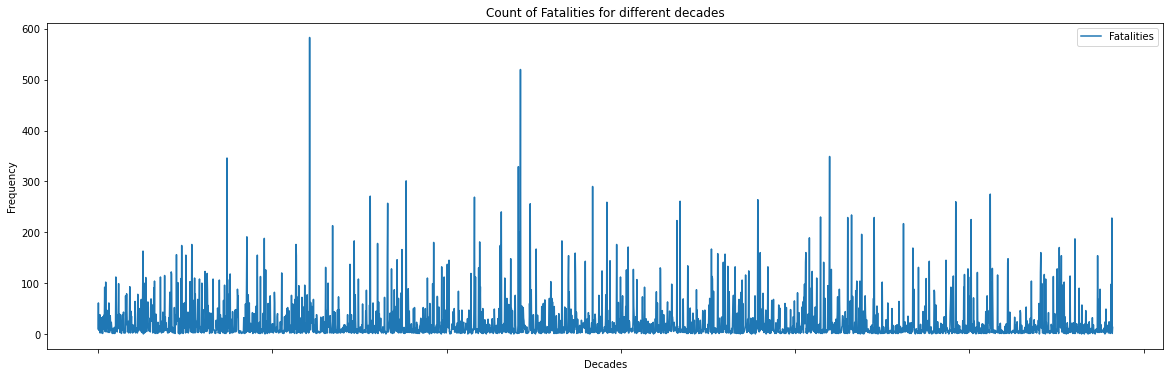

In [38]:
grouped_crash_clean_constant.plot(x="Year",y="Fatalities",kind="line",figsize=(20,6))
plt.title('Count of Fatalities for different decades')
plt.xlabel('Decades')
plt.ylabel('Frequency')
plt.savefig('FatalityrateAcrossDecades.png')
plt.show()

In [39]:
new1_df =grouped_crash_clean_constant.groupby('Year').mean()
new1_df

,const,Aboard,Fatalities,Fatalities_rate
Year,,,,
70's,1.0,33.681818,25.240143,83.896590
80's,1.0,36.920168,24.914923,82.596859
90's,1.0,33.293282,21.784516,80.647992
00's,1.0,27.501718,18.972509,81.729160


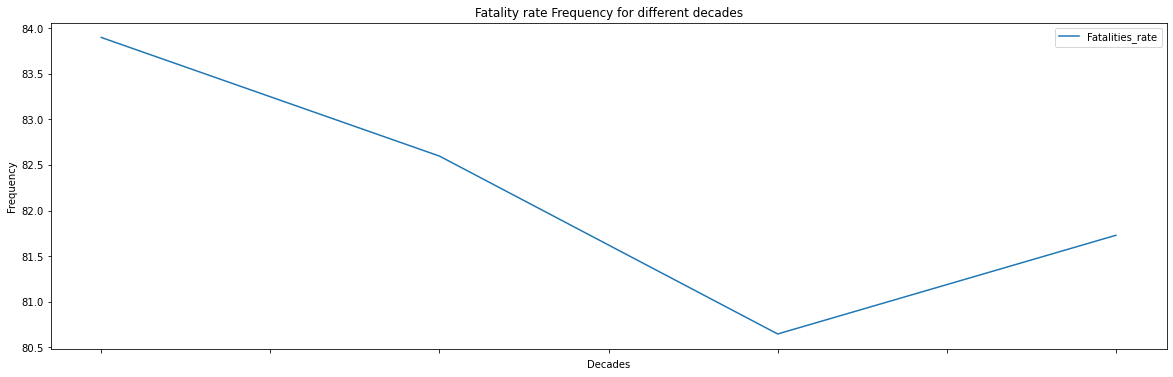

In [40]:
new1_df.plot(y="Fatalities_rate",kind="line",figsize=(20,6))
plt.title('Fatality rate Frequency for different decades')
plt.xlabel('Decades')
plt.ylabel('Frequency')
plt.savefig('FatalityrateAcrossDecades.png')
plt.show()

In [41]:
new2_df= grouped_crash_clean_df.copy()
new2_df.dropna(inplace=True)
new2_df.head()

,Date,Year,Location,Operator,Type,Aboard,Fatalities,Summary,Fatalities_rate
2,1973-10-12,70's,"Acapulco, Mexico",Avionas Banamex,de Havilland DH-125-1A,8.0,8.0,Crashed while approaching to land.,100.0
3,1973-10-15,70's,"Fort Smith AFB, Oklahoma",Military - U.S. Air Force,Lockheed C-130E Hercules,7.0,7.0,Crashed into a mountain.,100.0
5,1975-11-17,70's,"Near Sukhumi, Georgia, USSR",Aeroflot,Antonov AN-24,38.0,38.0,Crashed into high ground while descending.,100.0
6,1970-01-01,70's,"Nulato, Alaska",Galena Air Service - Air Taxi,Cessna 180,4.0,2.0,Emergency flight to airlift sick patient. Coll...,50.0
7,1970-01-05,70's,"Stockholm, Sweden",Spantax S.A.,Convair CV-990-30A-5,10.0,5.0,The plane developed trouble in the No. 4 engin...,50.0


In [42]:
new3_df= new2_df["Location"].str.split(",",n=1, expand=True) 

new3_df.head(15)

,0,1
2,Acapulco,Mexico
3,Fort Smith AFB,Oklahoma
5,Near Sukhumi,"Georgia, USSR"
6,Nulato,Alaska
7,Stockholm,Sweden
8,Near Villia Greece,None
9,Faleolo,Western Samoa
10,Mt. Pumacona,Peru
11,Portage,Michigan
12,Near Poza Rica,Mexico


In [43]:
new2_df["City_crash"] =new3_df[0]
new2_df["Country_crash"] =new3_df[1]
new2_df

,Date,Year,Location,Operator,Type,Aboard,Fatalities,Summary,Fatalities_rate,City_crash,Country_crash
2,1973-10-12,70's,"Acapulco, Mexico",Avionas Banamex,de Havilland DH-125-1A,8.0,8.0,Crashed while approaching to land.,100.0,Acapulco,Mexico
3,1973-10-15,70's,"Fort Smith AFB, Oklahoma",Military - U.S. Air Force,Lockheed C-130E Hercules,7.0,7.0,Crashed into a mountain.,100.0,Fort Smith AFB,Oklahoma
5,1975-11-17,70's,"Near Sukhumi, Georgia, USSR",Aeroflot,Antonov AN-24,38.0,38.0,Crashed into high ground while descending.,100.0,Near Sukhumi,"Georgia, USSR"
6,1970-01-01,70's,"Nulato, Alaska",Galena Air Service - Air Taxi,Cessna 180,4.0,2.0,Emergency flight to airlift sick patient. Coll...,50.0,Nulato,Alaska
7,1970-01-05,70's,"Stockholm, Sweden",Spantax S.A.,Convair CV-990-30A-5,10.0,5.0,The plane developed trouble in the No. 4 engin...,50.0,Stockholm,Sweden
...,...,...,...,...,...,...,...,...,...,...,...
2907,2009-05-20,00's,"Near Madiun, Indonesia",Military - Indonesian Air Force,Lockheed C-130 Hercules,112.0,98.0,"While on approach, the military transport cras...",87.5,Near Madiun,Indonesia
2908,2009-05-26,00's,"Near Isiro, DemocratiRepubliCongo",Service Air,Antonov An-26,4.0,4.0,The cargo plane crashed while on approach to I...,100.0,Near Isiro,DemocratiRepubliCongo
2909,2009-06-01,00's,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Airbus A330-203,228.0,228.0,The Airbus went missing over the AtlantiOcean ...,100.0,AtlantiOcean,"570 miles northeast of Natal, Brazil"
2910,2009-06-07,00's,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,Britten-Norman BN-2A-27 Islander,1.0,1.0,The air ambulance crashed into hills while att...,100.0,Near Port Hope Simpson,"Newfoundland, Canada"


In [44]:
new4_df= new2_df["Country_crash"].str.split(",",n=1, expand=True) 
new4_df

,0,1
2,Mexico,None
3,Oklahoma,None
5,Georgia,USSR
6,Alaska,None
7,Sweden,None
...,...,...
2907,Indonesia,None
2908,DemocratiRepubliCongo,None
2909,570 miles northeast of Natal,Brazil
2910,Newfoundland,Canada


In [45]:
import numpy as np

In [46]:
new4_df[0] =np.where(~new4_df[1].isnull(),new4_df[1],new4_df[0])

In [47]:
new4_df

,0,1
2,Mexico,None
3,Oklahoma,None
5,USSR,USSR
6,Alaska,None
7,Sweden,None
...,...,...
2907,Indonesia,None
2908,DemocratiRepubliCongo,None
2909,Brazil,Brazil
2910,Canada,Canada


In [48]:
new2_df["Country_crash"] =new4_df[0]
new2_df

,Date,Year,Location,Operator,Type,Aboard,Fatalities,Summary,Fatalities_rate,City_crash,Country_crash
2,1973-10-12,70's,"Acapulco, Mexico",Avionas Banamex,de Havilland DH-125-1A,8.0,8.0,Crashed while approaching to land.,100.0,Acapulco,Mexico
3,1973-10-15,70's,"Fort Smith AFB, Oklahoma",Military - U.S. Air Force,Lockheed C-130E Hercules,7.0,7.0,Crashed into a mountain.,100.0,Fort Smith AFB,Oklahoma
5,1975-11-17,70's,"Near Sukhumi, Georgia, USSR",Aeroflot,Antonov AN-24,38.0,38.0,Crashed into high ground while descending.,100.0,Near Sukhumi,USSR
6,1970-01-01,70's,"Nulato, Alaska",Galena Air Service - Air Taxi,Cessna 180,4.0,2.0,Emergency flight to airlift sick patient. Coll...,50.0,Nulato,Alaska
7,1970-01-05,70's,"Stockholm, Sweden",Spantax S.A.,Convair CV-990-30A-5,10.0,5.0,The plane developed trouble in the No. 4 engin...,50.0,Stockholm,Sweden
...,...,...,...,...,...,...,...,...,...,...,...
2907,2009-05-20,00's,"Near Madiun, Indonesia",Military - Indonesian Air Force,Lockheed C-130 Hercules,112.0,98.0,"While on approach, the military transport cras...",87.5,Near Madiun,Indonesia
2908,2009-05-26,00's,"Near Isiro, DemocratiRepubliCongo",Service Air,Antonov An-26,4.0,4.0,The cargo plane crashed while on approach to I...,100.0,Near Isiro,DemocratiRepubliCongo
2909,2009-06-01,00's,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Airbus A330-203,228.0,228.0,The Airbus went missing over the AtlantiOcean ...,100.0,AtlantiOcean,Brazil
2910,2009-06-07,00's,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,Britten-Norman BN-2A-27 Islander,1.0,1.0,The air ambulance crashed into hills while att...,100.0,Near Port Hope Simpson,Canada


In [49]:
countrydecade_df =new2_df[['Year','Aboard','Fatalities','Fatalities_rate','City_crash','Country_crash']].groupby(['Country_crash','Year']).count()
countrydecade_df.head(25)

Aboard  Fatalities  Fatalities_rate  City_crash
Country_crash    Year                                                 
  Australia      70's     NaN         NaN              NaN         NaN
                 80's     NaN         NaN              NaN         NaN
                 90's     1.0         1.0              1.0         1.0
                 00's     NaN         NaN              NaN         NaN
  Bolivia        70's     1.0         1.0              1.0         1.0
                 80's     NaN         NaN              NaN         NaN
                 90's     NaN         NaN              NaN         NaN
                 00's     NaN         NaN              NaN         NaN
  Brazil         70's     NaN         NaN              NaN         NaN
                 80's     NaN         NaN              NaN         NaN
                 90's     NaN         NaN              NaN         NaN
                 00's     1.0         1.0              1.0         1.0
  Cameroon       70's     NaN         NaN              NaN         NaN
                 80's     1.0         1.0              1.0         1.0
                 90's     NaN         NaN              NaN         NaN
                 00's     NaN         NaN              NaN         NaN
  Canada         70's     NaN         NaN              NaN         NaN
                 80's     1.0         1.0              1.0         1.0
                 90's     NaN         NaN              NaN         NaN
                 00's     NaN         NaN              NaN         NaN
  Canary Islands 70's     1.0         1.0              1.0         1.0
                 80's     NaN         NaN              NaN         NaN
                 90's     NaN         NaN              NaN         NaN
                 00's     NaN         NaN              NaN         NaN
  Colombia       70's     1.0         1.0              1.0         1.0

In [50]:
maxcountry_crash_df = new2_df['Country_crash'].value_counts()
maxcountry_crash_df

 Russia         134
 Alaska         126
 Colombia        98
 Brazil          88
 Canada          85
               ... 
 Kosovo           1
 Belize           1
 South Yemen      1
 Inodnesia        1
 Ghana            1
Name: Country_crash, Length: 338, dtype: int64

In [51]:
maxcountry_crash_df.columns=['Country_crash','count']
topten=maxcountry_crash_df.head(10)

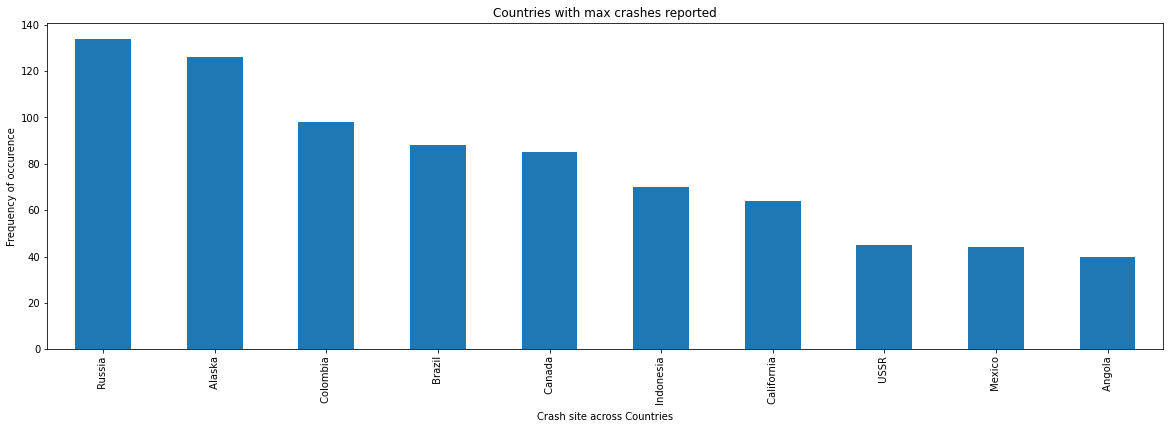

In [52]:
# maxcountry_crash_df.plot(x="Year",y="Fatalities",kind="line",figsize=(20,6))(y="Country_crash",y="Year",kind="line",figsize=(20,6))
topten.plot(kind="bar",figsize=(20,6))
plt.title('Countries with max crashes reported')
plt.xlabel('Crash site across Countries')
plt.ylabel('Frequency of occurence')
plt.savefig('FatalityrateAcrossCountries.png')
plt.show()
